In [107]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

#GRAPHICAL CONVERSIONS

In [59]:
#plot function
def race_plot(racedf, color):
    return plt.scatter(racedf.Place, racedf.Seconds, color=color)

###Heps Graphs

In [60]:
heps2010 = pd.read_csv('Old_Race_Results/2010_Heps.csv')
heps2008 = pd.read_csv('Old_Race_Results/2008_Heps.csv')
heps2007 = pd.read_csv('Old_Race_Results/2007_Heps.csv')
heps2006 = pd.read_csv('Old_Race_Results/2006_Heps.csv')
heps2005 = pd.read_csv('Old_Race_Results/2005_Heps.csv')
heps2004 = pd.read_csv('Old_Race_Results/2004_Heps.csv')
heps2003 = pd.read_csv('Old_Race_Results/2003_Heps.csv')
heps2002 = pd.read_csv('Old_Race_Results/2002_Heps.csv')
heps2001 = pd.read_csv('Old_Race_Results/2001_Heps.csv')
heps2000 = pd.read_csv('Old_Race_Results/2000_Heps.csv')
heps1999 = pd.read_csv('Old_Race_Results/1999_Heps.csv')
heps1998 = pd.read_csv('Old_Race_Results/1998_Heps.csv')

In [4]:
cutoff=75
heps2010 = heps2010[heps2010['Place'] <= cutoff]
heps2008 = heps2008[heps2008['Place'] <= cutoff]
heps2007 = heps2007[heps2007['Place'] <= cutoff]
heps2006 = heps2006[heps2006['Place'] <= cutoff]
heps2005 = heps2005[heps2005['Place'] <= cutoff]
heps2004 = heps2004[heps2004['Place'] <= cutoff]
heps2003 = heps2003[heps2003['Place'] <= cutoff]
heps2002 = heps2002[heps2002['Place'] <= cutoff]
heps2001 = heps2001[heps2001['Place'] <= cutoff]
heps2000 = heps2000[heps2000['Place'] <= cutoff]
heps1999 = heps1999[heps1999['Place'] <= cutoff]
heps1998 = heps1998[heps1998['Place'] <= cutoff]

(0, 85)

C:\Users\BUCKBEAK\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


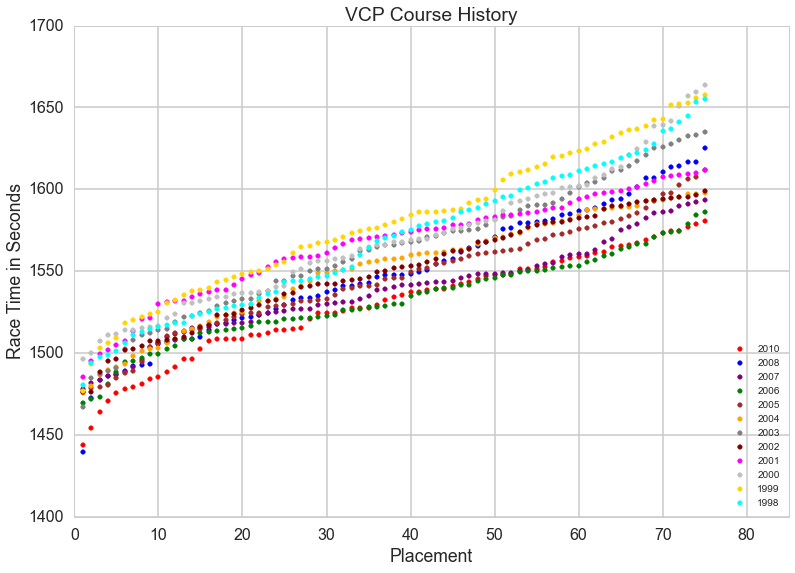

In [5]:
plot2010 = race_plot(heps2010, 'r')
plot2008 = race_plot(heps2008, 'blue')
plot2007 = race_plot(heps2007, 'purple')
plot2006 = race_plot(heps2006, 'green')
plot2005 = race_plot(heps2005, 'brown')
plot2004 = race_plot(heps2004, 'orange')
plot2003 = race_plot(heps2003, 'gray')
plot2002 = race_plot(heps2002, 'maroon')
plot2001 = race_plot(heps2001, 'magenta')
plot2000 = race_plot(heps2000, 'silver')
plot1999 = race_plot(heps1999, 'gold')
plot1998 = race_plot(heps1998, 'cyan')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.legend((plot2010, plot2008, plot2007, plot2006, plot2005, plot2004, plot2003, plot2002, plot2001, plot2000, plot1999,
           plot1998), ('2010', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998'),
    loc = 'lower right' , fontsize = 10
)
plt.title('VCP Course History')
plt.xlim(0, cutoff+10)

In [25]:
heps2010.head()

,Place,Score,FirstName,LastName,Year,Team,Time,Pace,Minutes,S,Seconds
0,1,1,Donn,Cabral,JR,Princeton,24:03.8,4:51,24,3.8,1443.8
1,2,2,Daniel,Chenoweth,SR,Harvard,24:14.0,4:53,24,14.0,1454.0
2,3,3,Ethan,Shaw,JR,Dartmouth,24:23.7,4:55,24,23.7,1463.7
3,4,4,Tom,Poland,SR,Columbia,24:30.4,4:56,24,30.4,1470.4
4,5,5,Brian,Leung,JR,Princeton,24:35.6,4:57,24,35.6,1475.6


lm intercept:  1477.97230769
lm slope:  1.69540572233


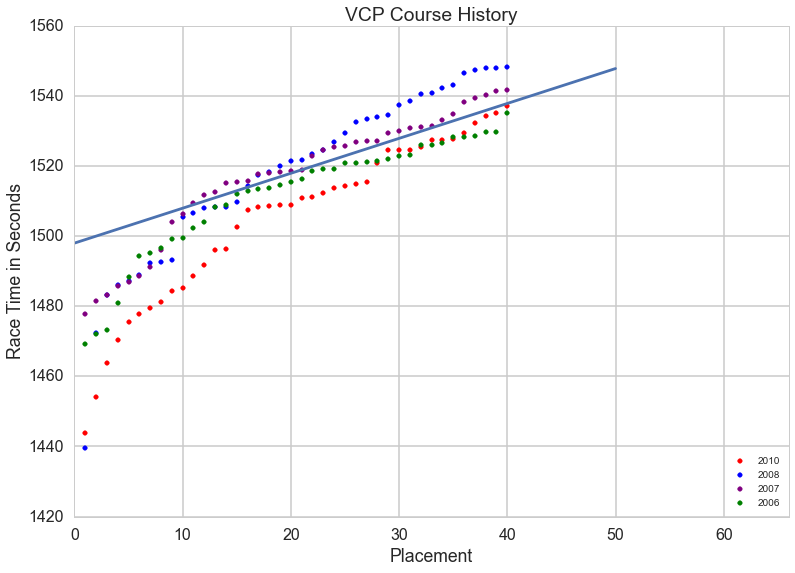

In [308]:
#Last 4 Heps Races
cutoff=60
heps2010 = heps2010[heps2010['Place'] <= cutoff]
heps2008 = heps2008[heps2008['Place'] <= cutoff]
heps2007 = heps2007[heps2007['Place'] <= cutoff]
heps2006 = heps2006[heps2006['Place'] <= cutoff]
plot2010 = race_plot(heps2010, 'r')
plot2008 = race_plot(heps2008, 'blue')
plot2007 = race_plot(heps2007, 'purple')
plot2006 = race_plot(heps2006, 'green')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.legend((plot2010, plot2008, plot2007, plot2006), ('2010', '2008', '2007', '2006'), loc = 'lower right' , fontsize = 10)
plt.title('VCP Course History')
plt.xlim(0, cutoff+6)

#clf = linear_model.LinearRegression()
#clf = clf.fit(x,y)
#intercept = clf.intercept_
#coefficients = clf.coef_

x = heps2010.Place.tolist() + heps2008.Place.tolist() + heps2007.Place.tolist() + heps2006.Place.tolist()
y = heps2010.Seconds.tolist() + heps2008.Seconds.tolist() + heps2007.Seconds.tolist() + heps2006.Seconds.tolist()
regdf = pd.DataFrame(dict(Place = x, Seconds = y))
reg = ols('Seconds ~ Place', regdf).fit()
#plt.plot(regdf['Place'], reg.fittedvalues)
#regressionplots.abline_plot([intercept, ...])
#sns.regplot(x,y)
slope_reg = reg.params[1]
int_reg = reg.params[0]
print "lm intercept: ", int_reg
print "lm slope: ", slope_reg
x = np.linspace(0, 50)
plt.plot(x, (slope_reg-0.7)*x + (int_reg+20))

In [310]:
vcp_int = int_reg + 20
vcp_slope = slope_reg - 0.7
print "VCP intercept: ", vcp_int
print "VCP slope: ", vcp_slope

VCP intercept:  1497.97230769
VCP slope:  0.995405722326


### Wisconsin

In [336]:
wisco2014 = pd.read_csv('Old_Race_Results/2014_Wisco.csv')
wisco2013 = pd.read_csv('Old_Race_Results/2013_Wisco.csv')
wisco2012 = pd.read_csv('Old_Race_Results/2012_Wisco.csv')
wisco2011 = pd.read_csv('Old_Race_Results/2011_Wisco.csv')
wisco2010 = pd.read_csv('Old_Race_Results/2010_Wisco.csv')

In [337]:
cutoff=200
wisco2014 = wisco2014[wisco2014['Place'] <= cutoff]
wisco2013 = wisco2013[wisco2013['Place'] <= cutoff]
wisco2012 = wisco2012[wisco2012['Place'] <= cutoff]
wisco2011 = wisco2011[wisco2011['Place'] <= cutoff]
wisco2010 = wisco2010[wisco2010['Place'] <= cutoff]

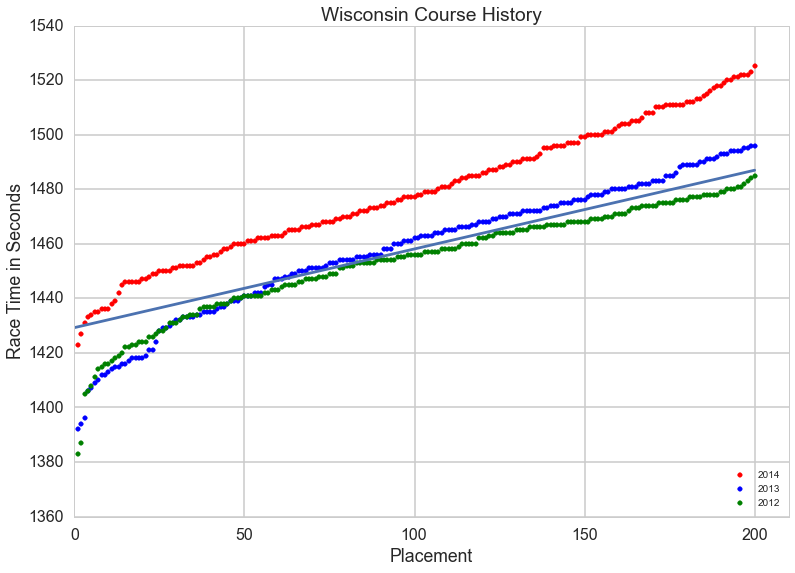

In [338]:
plot2014 = race_plot(wisco2014, 'r')
plot2013 = race_plot(wisco2013, 'blue')
plot2012 = race_plot(wisco2012, 'green')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Wisconsin Course History')
plt.legend((plot2014, plot2013, plot2012), ('2014', '2013', '2012'),
    loc = 'lower right' , fontsize = 10
)
plt.xlim(0,cutoff+10)

x = wisco2014.Place.tolist() + wisco2013.Place.tolist() + wisco2012.Place.tolist()
y = wisco2014.Seconds.tolist() + wisco2013.Seconds.tolist() + wisco2012.Seconds.tolist()
regdf = pd.DataFrame(dict(Place = x, Seconds = y))
reg = ols('Seconds ~ Place', regdf).fit()

slope_reg = reg.params[1]
int_reg = reg.params[0]
x = np.linspace(0, 200)
plt.plot(x, (slope_reg-0.1)*x + (int_reg+5))

In [314]:
wisco_int = int_reg + 7
wisco_slope = slope_reg - 0.1
print "Wisconsin intercept: ", wisco_int
print "Wisconsin slope: ", wisco_slope

Wisconsin intercept:  1431.27169179
Wisconsin slope:  0.28850721268


###Franklin Park 10K

In [294]:
ncaa_2005 = pd.read_csv('Old_Race_Results/2005_NCAA.csv')
ncaa_2007 = pd.read_csv('Old_Race_Results/2007_NCAA.csv')
ne_2015 = pd.read_csv('Old_Race_Results/2015_NE_FP.csv')
ne_2014 = pd.read_csv('Old_Race_Results/2014_NE_FP.csv')

In [295]:
cutoff=200
ncaa_2005 = ncaa_2005[ncaa_2005['Place'] <= cutoff]
ncaa_2007 = ncaa_2007[ncaa_2007['Place'] <= cutoff]
ne_2015 = ne_2015[ne_2015['Place'] <= cutoff]
ne_2014 = ne_2014[ne_2014['Place'] <= cutoff]

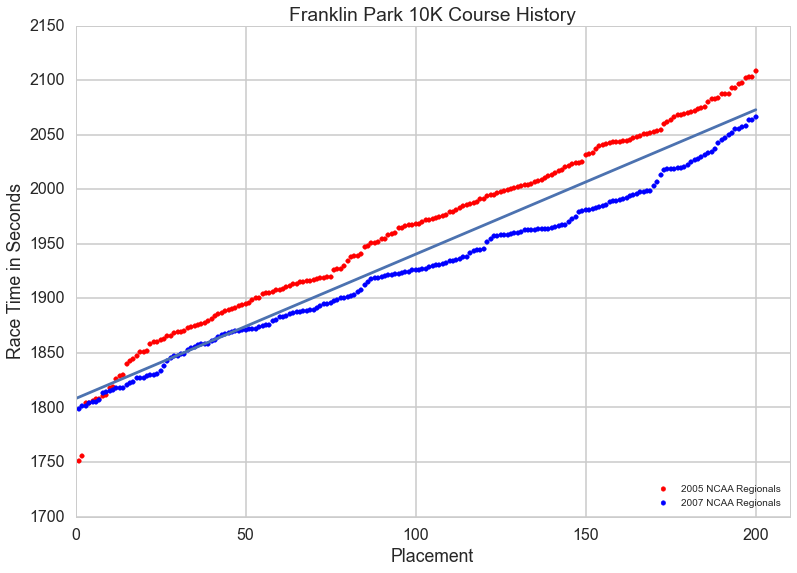

In [296]:
plot2005 = race_plot(ncaa_2005, 'r')
plot2007 = race_plot(ncaa_2007, 'blue')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Franklin Park 10K Course History')
plt.legend((plot2005, plot2007), ('2005 NCAA Regionals', '2007 NCAA Regionals'),
    loc = 'lower right' , fontsize = 10
)
plt.xlim(0,cutoff+10)

x = ncaa_2005.Place.tolist() + ncaa_2007.Place.tolist()
y = ncaa_2005.Seconds.tolist() + ncaa_2005.Seconds.tolist()
regdf = pd.DataFrame(dict(Place = x, Seconds = y))
reg = ols('Seconds ~ Place', regdf).fit()

slope_reg = reg.params[1]
int_reg = reg.params[0]
x = np.linspace(0, 200)
plt.plot(x, (slope_reg-0.1)*x + (int_reg - 10))

In [298]:
fp10K_int = int_reg - 10
fp10K_slope = slope_reg - 0.1
print "Franklin Park 10K intercept: ", fp10K_int
print "Franklin Park 10K slope: ", fp10K_slope

Franklin Park 10K intercept:  1808.13234673
Franklin Park 10K slope:  1.32359356484


###Goddard Park 8K

In [299]:
brown_2014 = pd.read_csv('Old_Race_Results/2014_Brown.csv')
brown_2013 = pd.read_csv('Old_Race_Results/2013_Brown.csv')
brown_2012 = pd.read_csv('Old_Race_Results/2012_Brown.csv')
brown_2010 = pd.read_csv('Old_Race_Results/2010_Brown.csv')

In [300]:
cutoff=30
brown_2014 = brown_2014[brown_2014['Place'] <= cutoff]
brown_2013 = brown_2013[brown_2013['Place'] <= cutoff]
brown_2012 = brown_2012[brown_2012['Place'] <= cutoff]
brown_2010 = brown_2010[brown_2010['Place'] <= cutoff]

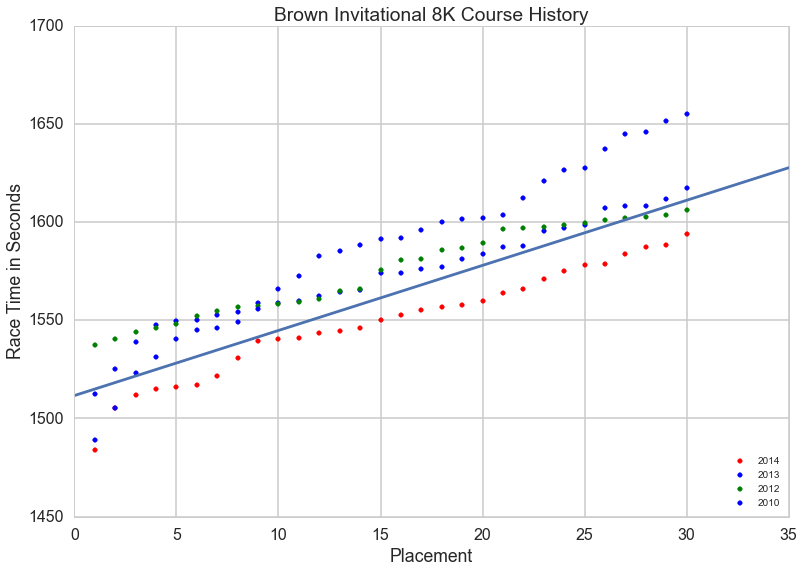

In [301]:
plot2014 = race_plot(brown_2014, 'r')
plot2013 = race_plot(brown_2013, 'blue')
plot2012 = race_plot(brown_2012, 'green')
plot2010 = race_plot(brown_2010,'blue')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Brown Invitational 8K Course History')
plt.legend((plot2014, plot2013, plot2012, plot2010), ('2014', '2013', '2012', '2010'),
    loc = 'lower right' , fontsize = 10
)
plt.xlim(0, cutoff+5)

x = brown_2014.Place.tolist() + brown_2013.Place.tolist() + brown_2012.Place.tolist() + brown_2010.Place.tolist()
y = brown_2014.Seconds.tolist() + brown_2013.Seconds.tolist() + brown_2012.Seconds.tolist() + brown_2010.Seconds.tolist()
regdf = pd.DataFrame(dict(Place = x, Seconds = y))
reg = ols('Seconds ~ Place', regdf).fit()

slope_reg = reg.params[1]
int_reg = reg.params[0]
x = np.linspace(0, cutoff+5)
plt.plot(x, (slope_reg-0.05)*x + (int_reg - 7))

In [302]:
brown_int = int_reg - 7
brown_slope = slope_reg - 0.05
print "Brown intercept: ", brown_int
print "Brown slope: ", brown_slope

Brown intercept:  1511.63206897
Brown slope:  3.31357619577


###Franklin Park 8K

In [321]:
beantown_2014 = pd.read_csv('Old_Race_Results/2014_BoB.csv')
beantown_2013 = pd.read_csv('Old_Race_Results/2013_BoB.csv')
ne_2014 = pd.read_csv('Old_Race_Results/2014_NE.csv')
ne_2013 = pd.read_csv('Old_Race_Results/2013_NE.csv')
ne_2011 = pd.read_csv('Old_Race_Results/2011_NE.csv')
ne_2010 = pd.read_csv('Old_Race_Results/2010_NE.csv')

In [322]:
cutoff=200
beantown_2014 = beantown_2014[beantown_2014['Place'] <= cutoff]
beantown_2013 = beantown_2013[beantown_2013['Place'] <= cutoff]
ne_2014 = ne_2014[ne_2014['Place'] <= cutoff]
ne_2013 = ne_2013[ne_2013['Place'] <= cutoff]
ne_2011 = ne_2011[ne_2011['Place'] <= cutoff]
ne_2010 = ne_2010[ne_2010['Place'] <= cutoff]

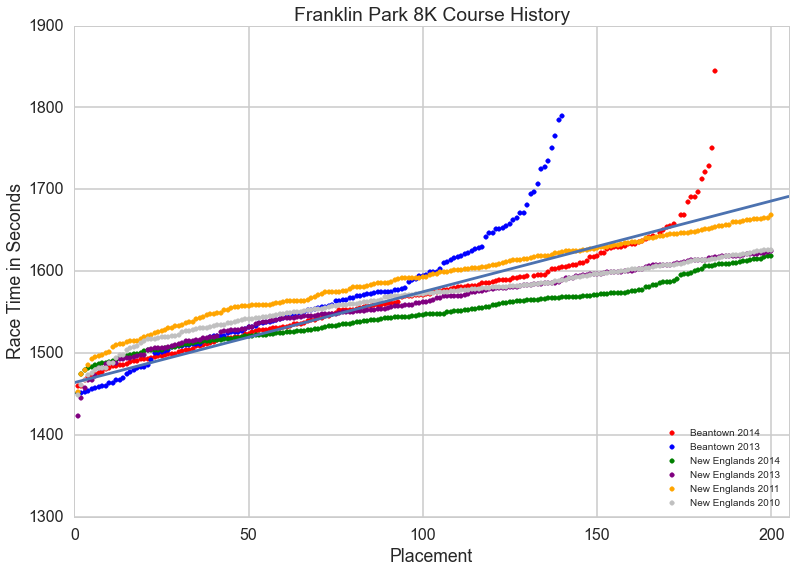

In [323]:
plot2014 = race_plot(beantown_2014, 'r')
plot2013 = race_plot(beantown_2013, 'blue')
plot_ne2014 = race_plot(ne_2014, 'green')
plot_ne2013 = race_plot(ne_2013, 'purple')
plot_ne2011 = race_plot(ne_2011, 'orange')
plot_ne2010 = race_plot(ne_2010, 'silver')
plt.xlabel('Placement')
plt.ylabel('Race Time in Seconds')
plt.title('Franklin Park 8K Course History')
plt.legend((plot2014, plot2013, plot_ne2014, plot_ne2013, plot_ne2011, plot_ne2010), ('Beantown 2014', 'Beantown 2013', 
    'New Englands 2014', 'New Englands 2013', 'New Englands 2011', 'New Englands 2010'),
    loc = 'lower right' , fontsize = 10
)
plt.xlim(0, cutoff+5)

x = beantown_2014.Place.tolist() + beantown_2013.Place.tolist() + ne_2014.Place.tolist() + ne_2013.Place.tolist() + ne_2011.Place.tolist() + ne_2010.Place.tolist()
y = beantown_2014.Seconds.tolist() + beantown_2013.Seconds.tolist() + ne_2014.Seconds.tolist() + ne_2013.Seconds.tolist() + ne_2011.Seconds.tolist() + ne_2010.Seconds.tolist()
regdf = pd.DataFrame(dict(Place = x, Seconds = y))
reg = ols('Seconds ~ Place', regdf).fit()

slope_reg = reg.params[1]
int_reg = reg.params[0]
x = np.linspace(0, cutoff+5)
plt.plot(x, (slope_reg+0.3)*x + (int_reg - 25))

In [324]:
fp8K_int = int_reg - 23
fp8K_slope = slope_reg + 0.25
print "Franklin Park 8K intercept: ", fp8K_int
print "Franklin Park 8K slope: ", fp8K_slope

Franklin Park 8K intercept:  1465.74946982
Franklin Park 8K slope:  1.05956425662


In [320]:
print 'Franklin Park 8K: ', fp8K_int
print 'VCP 8K: ', vcp_int
print 'Wisconsin 8K: ', wisco_int
print 'Brown 8K: ', brown_int
print 'Franklin Park 10K: ', fp10K_int

Franklin Park 8K:  1465.74946982
VCP 8K:  1497.97230769
Wisconsin 8K:  1431.27169179
Brown 8K:  1511.63206897
Franklin Park 10K:  1808.13234673


### GRAPHICAL CONVERSIONS

In [335]:
#VCP to Wisconsin
print 'VCP to Wisconsin: subtract', vcp_int - wisco_int, 'seconds'
print 'VCP to Franklin Park 8K: subtract', vcp_int - fp8K_int, 'seconds'
#47 seconds is using McMillan's Running Calculator
print 'VCP to Franklin Park 10K: add', fp10K_int - vcp_int + 47, 'seconds'
print 'VCP to Brown:', vcp_int - brown_int, 'seconds'

VCP to Wisconsin: subtract 66.7006159 seconds
VCP to Franklin Park 8K: subtract 32.2228378692 seconds
VCP to Franklin Park 10K: add 357.160039041 seconds
VCP to Brown: -13.6597612732 seconds
